# National Tsing Hua University Robust and Stochastic Portfolio Optimization (Fall 2021)
  Week 1 : Introduction
  1. Overview of Optimization Models 
  2. Type of Optimization Models 
  3. Solution to Optimization Problems 
  4. Financial Optimization Models 

Python Package - Scipy , CVXPY
  

(一.) Overview of Optimization Models 

Exercise 1.2  
    $$ f(x) := { logx    , x>0  , -\infty , x=0 } , f:[0,1]$$ 
    
we seek to findx such that max_{x} f(x). Find the Optimal Solution to the problem and the associated optimal value .



     fun: -0.0
     jac: array([-1.00000001])
 message: 'Optimization terminated successfully'
    nfev: 2
     nit: 1
    njev: 1
  status: 0
 success: True
       x: array([1.])


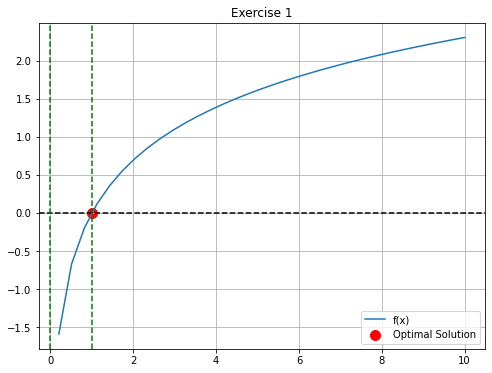

In [2]:
import warnings
import numpy as np 
import cvxpy as cv

import matplotlib.pyplot as plt 
from scipy.optimize import minimize
warnings.filterwarnings("ignore")


def objective_function(x):

    return -np.log(x)


bound = [(0,1)]                 # f:[0,1]
initial_weight = np.ones(1)     # initial weights 
result         = minimize(objective_function,initial_weight,method='SLSQP',bounds=bound)
print(result)

# Plot Figure
x = np.linspace(-5,10)
y = np.log(x)
fig,ax = plt.subplots(figsize=(8,6))
ax.set_title('Exercise 1')
ax.plot(x,y,label='f(x)')
ax.scatter(result['x'],objective_function(result['x']),s=100,color='red',label='Optimal Solution')

ax.axhline(0,linestyle='--',color='black')
ax.axvline(0,linestyle='--',color='green')
ax.axvline(1,linestyle='--',color='green')

ax.legend()
ax.grid()

Exercise 1.3  
    Infeasible Problem and Unbounded Problem , Consider the Following Optimization Problem and jusity wheather it's feasible , bouned ?
    
(i) consider the following optimization problem
    $$ Min F(x) = x+y  $$ 
    $$ s.t. x \geq 6 $$ 
    $$ y \geq 6 $$ 
    $$ x+y \leq 11 $$ 
    


     fun: 12.0
     jac: array([1., 1.])
 message: 'Positive directional derivative for linesearch'
    nfev: 3
     nit: 5
    njev: 1
  status: 8
 success: False
       x: array([6., 6.])


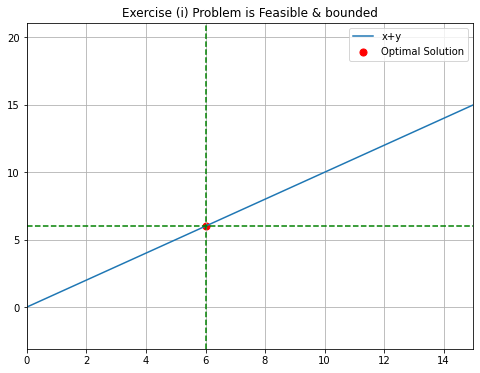

In [3]:
def objective_function(params):

    x =  params[0]
    y =  params[1]

    return x+y

def constraint(params) : 
    
    x =  params[0]
    y =  params[1]

    return 11-(x+y)


constraint = { 'type': 'eq','fun':  constraint }

bounds         = [(6,None),(6,None)]                      # Subject to Constraint 1,2
constraint     = [constraint]                             # Subject to Constraint 3
initial_weight = np.ones((2,1))                           # initial weights 
result         = minimize(objective_function,initial_weight,method='SLSQP',constraints=constraint,bounds=bounds)
print(result)

# Plot Figure
x = np.linspace(-2,20)
y = x


fig,ax = plt.subplots(figsize=(8,6))
ax.set_title('Exercise (i) Problem is Feasible & bounded')
ax.plot(x,y,label='x+y')
ax.scatter(result['x'][0],result['x'][1],label='Optimal Solution',s=50,color='r')
ax.axhline(6,linestyle='--',color='green')
ax.axvline(6,linestyle='--',color='green')

ax.set_xlim(0,15)
ax.legend()
ax.grid()

(ii) consider the following optimization problem
    $$ Min F(x) = x+y  $$ 
    $$ s.t. x \geq 0 $$ 
    $$ y \geq 0 $$ 

     fun: 0.0
     jac: array([1., 1.])
 message: 'Optimization terminated successfully'
    nfev: 6
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([0., 0.])


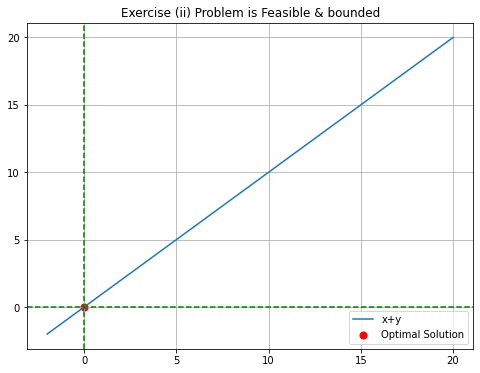

In [4]:
def objective_function(params):

    x =  params[0]
    y =  params[1]

    return x+y


bounds         = [(0,None),(0,None)]                      # Subject to Constraint 1,2
initial_weight = np.ones((2,1))                           # initial weights 
result         = minimize(objective_function,initial_weight,method='SLSQP',bounds=bounds)
print(result)

# Plot Figure
x = np.linspace(-2,20)
y = x

fig,ax = plt.subplots(figsize=(8,6))
ax.set_title('Exercise (ii) Problem is Feasible & bounded')
ax.plot(x,y,label='x+y')
ax.scatter(result['x'][0],result['x'][1],label='Optimal Solution',s=50,color='r')
ax.axhline(0,linestyle='--',color='green')
ax.axvline(0,linestyle='--',color='green')

ax.legend()
ax.grid()

(iii) consider the following optimization problem
    $$ Max F(x) = x+y  $$ 
    $$ s.t. x \geq 0 $$ 
    $$ y \geq 0 $$ 

     fun: -122070313.99999997
     jac: array([0., 0.])
 message: 'Optimization terminated successfully'
    nfev: 39
     nit: 13
    njev: 13
  status: 0
 success: True
       x: array([61035156.99999996, 61035157.        ])


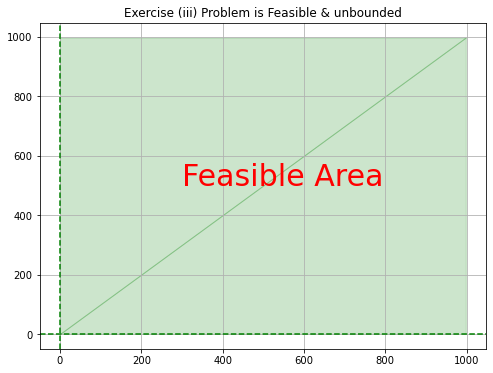

In [5]:
def objective_function(params):

    x =  params[0]
    y =  params[1]

    return -(x+y)


bounds         = [(0,None),(0,None)]                      # Subject to Constraint 1,2
initial_weight = np.ones((2,1))                           # initial weights 
result         = minimize(objective_function,initial_weight,method='SLSQP',bounds=bounds)
print(result)

# Plot Figure
fig,ax = plt.subplots(figsize=(8,6))
ax.set_title('Exercise (iii) Problem is Feasible & unbounded')
ax.axhline(0,linestyle='--',color='green')
ax.axvline(0,linestyle='--',color='green')
ax.annotate('Feasible Area',xy=(np.arange(1,999)[-700],np.arange(1,999)[-500]),color='red',size=30)
ax.fill_betweenx(np.arange(1,999),np.arange(1,999),color='green',alpha=0.2)
ax.fill_between(np.arange(1,999),np.arange(1,999),color='green' ,alpha=0.2)

ax.grid()

(二.) Type of Optimization Function

1. convex optimization problem - linear programming , quadratic programming
2. Mixed Integer Optimization 
3. stochastic and Dynamic Optimization 
4. Robust Optimization

(i) Example of Linear Programming  
    $$ Min F(x) = c^T x $$ 
    $$ s.t. Ax = b $$ 
    $$ Dx \geq d $$ 


(i) Example

$$ Max F(x) =  2x1 +1x2 $$ 
$$ s.t. x1 + x2 \leq  10 $$ 
$$ x1 + 3x2 \leq  5 $$ 
$$ x1 \geq  0 $$ 
$$ x1 \geq  0 $$ 


     fun: -20.000000000000377
     jac: array([-2., -1.])
 message: 'Optimization terminated successfully'
    nfev: 15
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([1.0000000e+01, 1.7985613e-14])


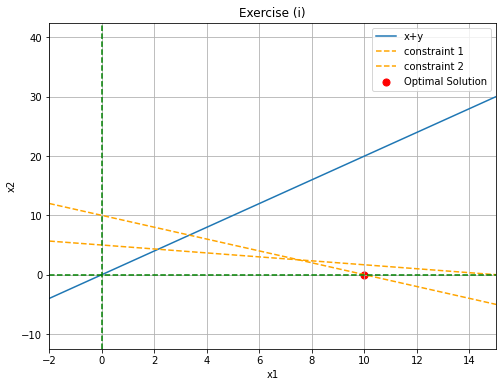

In [6]:
def objective_function(params):

    x1 =  params[0]
    x2 =  params[1]

    return -(2*x1+1*x2)


def inequally_constraint_1(params) : 
    
    x1 =  params[0]
    x2 =  params[1]

    return (10-(x1+x2))


def inequally_constraint_2(params) : 
    
    x1 =  params[0]
    x2 =  params[1]

    return ( 15-(x1+3*x2) )

constraint_1 = { 'type': 'ineq','fun':  inequally_constraint_1}
constraint_2 = { 'type': 'ineq','fun':  inequally_constraint_2}


bounds         = [(0,None),(0,None)]                      # Subject to Constraint 3,4
constraint     = [constraint_1,constraint_2]              # Subject to Constraint 1,2
initial_weight = np.ones((2,1))                           # initial weights 
result         = minimize(objective_function,initial_weight,method='SLSQP',constraints=constraint,bounds=bounds)
print(result)


# Plot Figure
x = np.linspace(-2,20)
y = 2*x
constraint_1_y = 10 - x
constraint_2_y = (15 - x)/3

fig,ax = plt.subplots(figsize=(8,6))
ax.set_title('Exercise (i)')
ax.plot(x,y,label='x+y')
ax.plot(x,constraint_1_y,label='constraint 1',color='orange',linestyle='--')
ax.plot(x,constraint_2_y,label='constraint 2',color='orange',linestyle='--')

ax.scatter(result['x'][0],result['x'][1],label='Optimal Solution',s=50,color='r')
ax.axhline(0,linestyle='--',color='green')
ax.axvline(0,linestyle='--',color='green')

ax.set_xlim(-2,15)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend()
ax.grid()

(ii) Example of quardratice Programming 
    $$ Min F(x) = {1/2} * x^TQx + c^Tx  $$ 
    $$ s.t. Ax = b $$ 
    $$ Dx \geq d $$ 

Example 
    $$ Min F(x) = (x1-x2)^2 $$
    $$ s.t. x1 + x2  \geq 5 $$ 
    $$ x1 + x2 \leq 6 $$ 
    $$ x1  \geq 0 $$ 
    $$ x2  \geq 0 $$ 



     fun: 0.0
     jac: array([1.49011612e-08, 1.49011612e-08])
 message: 'Optimization terminated successfully'
    nfev: 4
     nit: 1
    njev: 1
  status: 0
 success: True
       x: array([2.5, 2.5])


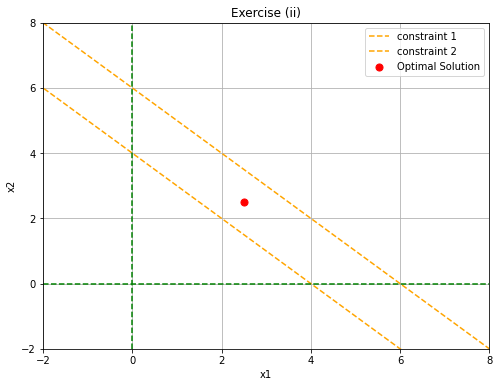

In [7]:
def objective_function(params):

    x1 =  params[0]
    x2 =  params[1]

    return  (x1-x2)**2 


def inequality_constraint_1(params) : 
    
    x1 =  params[0]
    x2 =  params[1]

    return  -1* ( 5 - (x1+x2) )


def inequality_constraint_2(params) : 
    
    x1 =  params[0]
    x2 =  params[1]

    return  6-(x1+x2) 


constraint_1 = { 'type': 'ineq','fun'  :  inequality_constraint_1 }
constraint_2 = { 'type': 'ineq','fun'  :  inequality_constraint_2 }


bounds         = [(0,None),(0,None)]                      # Subject to Constraint 3,4
constraint     = [constraint_1,constraint_2]              # Subject to Constraint 1,2
initial_weight = np.ones((2,1))                           # initial weights 
result         = minimize(objective_function,initial_weight,method='SLSQP',constraints=constraint,bounds=bounds)
print(result)


# plot figure
x = np.linspace(-5,20)
constraint_1_y = 4 - x
constraint_2_y = 6 - x

fig,ax = plt.subplots(figsize=(8,6))
ax.set_title('Exercise (ii)')
ax.scatter(result['x'][0],result['x'][1],label='Optimal Solution',s=50,color='r')
ax.plot(x,constraint_1_y,label='constraint 1',color='orange',linestyle='--')
ax.plot(x,constraint_2_y,label='constraint 2',color='orange',linestyle='--')

ax.axhline(0,linestyle='--',color='green')
ax.axvline(0,linestyle='--',color='green')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_xlim(-2,8)
ax.set_ylim(-2,8)
ax.legend()
ax.grid()

(iii) Example of Stochastic and Dynamic Programming 
    $$ Min  E[F(x,w)] $$ 
    $$ s.t. x \in X $$ 

where E[] denoted the mathematical expection operator

(iV) Example of Robust Optimization
    $$ Min  f(x;p) $$ 
    $$ s.t. g_{i}(x) \leq 0  , i=1,....,m $$ 
